# BEE 4750 Homework 1: Introduction to Using Julia

**Name**:

**ID**:

> **Due Date**
>
> Thursday, 9/5/24, 9:00pm

## Overview

### Instructions

-   Problem 1 consist of a series of code snippets for you to interpret
    and debug. You will be asked to identify relevant error(s) and fix
    the code.
-   Problem 2 gives you some code that works as intended; your goal is
    to identify the code’s purpose by following its logic.
-   Problem 3 asks you to write code to generate a random vector and
    subtract off its mean, using a Julia syntax called broadcasting.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.
-   Problem 5 (5750 only) asks you to use more advanced Julia
    techniques.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [3]:
import Pkg
Pkg.add("PythonPlot")
Pkg.activate(@__DIR__)
Pkg.instantiate()

   Resolving package versions...
  No Changes to `~/github/Cornell/BEE-5750/hw1-duckduckgogogo/Project.toml`
  No Changes to `~/github/Cornell/BEE-5750/hw1-duckduckgogogo/Manifest.toml`
  Activating project at `~/github/Cornell/BEE-5750/hw1-duckduckgogogo`


Standard Julia practice is to load all needed packages at the top of a
file. If you need to load any additional packages in any assignments
beyond those which are loaded by default, feel free to add a `using`
statement, though [you may need to install the
package](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#package-management).

In [4]:
using Random
using Plots
using GraphRecipes
using LaTeXStrings
using Statistics
# using pythonplot()

In [5]:
# this sets a random seed, which ensures reproducibility of random number generation. You should always set a seed when working with random numbers.
Random.seed!(1)

TaskLocalRNG()

## Problems (Total: 50/60 Points)

### Problem 1 (15 points)

The following subproblems all involve code snippets that require
debugging.

**For each of them**:

-   identify and describe the logic and/or syntax error;
-   write a fixed version of the function;
-   use your fixed function to solve the problem.

#### Problem 1.1

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

In [6]:
function minimum(array)
    min_value = array[1]
    for i in 1:length(array)
        # println(i, " ", array[i])
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 78


#### <font color = 'blue'> **SOLUTION - PROBLEM 1.1** </font>

The error was that min_value was initialized to 0 at the start of the function. However, if the input parameter *array* contains only positive values, the function will output 0 as the minimum value rather than the smallest element of *array*. To fix this error, min_value is now initialized as the first element of *array* so that array elements are only compared against themselves to find the minimum one. 

#### Problem 1.2

Your team is trying to compute the average grade for your class, but the
following code produces an error.

In [7]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(grades)
  return average_grade
end
average_grade = class_average(student_grades)
@show average_grade;

average_grade = 94.4


#### <font color = 'blue'> **SOLUTION - PROBLEM 1.2** </font>

There were three errors in this code. 

First of all, *mean* had not been imported yet, so I added *using Statistics* into the import packages code snippet above. 

Second, the function *mean* was being called on the global variable *student_grades* rather than the function parameter *grades*. I modified the code so that the *mean* function was called on the input parameter *grades*. 

Third, *average_grade* had not been defined before it was printed at the end of the function. Thus, I defined it by calling *class_average* on *student_grades* using the code *class_average(student_grades)*.

#### Problem 1.3

Your team wants to know the expected payout of an old Italian dice game
called *passadieci* (which was analyzed by Galileo as one of the first
examples of a rigorous study of probability). The goal of passadieci is
to get at least an 11 from rolling three fair, six-sided dice. Your
strategy is to compute the average wins from 1,000 trials, but the code
you’ve written below produces an error.

In [8]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1_000
# outcomes = zero(n_trials)
outcomes = []
for i = 1:n_trials
    push!(outcomes, (sum(passadieci()) > 11))
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

win_prob = 0.382


#### <font color = 'blue'> **SOLUTION - PROBLEM 1.3** </font>

The error in this code was that it was treating *outcomes* as an array of length *n_trials* with initialized values of 0. However, *zeros(n_trials)* actually outputs the additive identity element of type Int64, a.k.a. 0. Since *outcomes* was an Int64 value rather than an array, attempting to access "elements" of *outcomes* using *outcomes[i]* was producing errors.

To fix this code, I initialized *outcomes* as an array using *outcomes = []*. Then within the *for* loop, I pushed new boolean values from our expression onto the *outcomes* array using *push!(outcomes, (sum(passadieci()) > 11)*.

### Problem 2 (5 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

In [9]:
function mystery_function(values)
    y = []
    for v in values  # Iterate through elements of the input array values
        if !(v in y)  # If this element is not already in our output array y, append it to y
            append!(y, v)
        end
    end
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

# Built-in Julia function that does the same thing as mystery_function
@show unique!(list_of_values)
mystery_function(list_of_values) == unique!(list_of_values)

mystery_function(list_of_values) = Any[1, 2, 3, 4]
unique!(list_of_values) = [1, 2, 3, 4]


true

**In this problem**:

-   Explain the purpose of `mystery_function`.
-   Add comments to the code, explaining why and how it works. Refer to
    [“Best Practices for Writing Code
    Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
    and remember that bad comments can be just as bad as no comments at
    all. You do not need to add comments to every line (in fact, this is
    very bad practice), but you should note the *purpose* of every
    “section” of code, and add comments explaining any code sequences
    that you don’t immediately understand.
-   Is there a built-in Julia function that does the same thing as
    `mystery_function`? If so, what is it? Use it to do the same thing
    as the code above.

#### <font color = 'blue'> **SOLUTION - PROBLEM 2** </font>

*mystery_function* takes in an array and returns an array of its unique values. 

The function *unique* accomplishes the same purpose as *mystery_function*.

### Problem 3 (10 points)

You’re interested in writing some code to remove the mean of a vector.

**In this problem**:

-   Write a function `compute_mean(v)` which sums all of the elements of
    a vector `v` using a `for` loop and computes the mean.
-   Make a random vector `random_vect` of length 10 using Julia’s
    `rand()` function. Use your `compute_mean()` function to calculate
    its mean and subtract it from `random_vect` **without a loop**
    (using a Julia technique called *broadcasting*; feel free to consult
    the Julia documentation and search as necessary). Check that the new
    vector has mean zero.

In [10]:
function compute_mean(v)
    sum = 0
    for i in v  # Sum all elements of vector
        sum += i
    end
    mean = sum / length(v)  # Compute mean of vector
    return mean
end

random_vect = rand(10)  # Make random vector of length 10
my_mean = compute_mean(random_vect)
new_random_vect = random_vect .- my_mean  # Subtract mean of random_vect from random_vect using broadcasting
new_mean = compute_mean(new_random_vect)

println(new_mean)
new_mean == 0

4.4408920985006264e-17


false

#### <font color = 'blue'> **SOLUTION - PROBLEM 3** </font>

As directed, I wrote the function *compute_mean* which takes in a vector and outputs its mean. It accomplishes this by iterating through the elements of the vector and calculating their cumulative sum then dividing this sum by the number of elements in the vector. 

Next, I use *rand* to create a random vector, *random_vect*, of length 10. 

We compute the mean, *my_mean*, of *random_vect* using our function *compute_mean*. Then we broadcast the dot operator *.-* in order to subtract *my_mean* from *random_vect* element-wise. 

To verify that the mean of random_vect is now 0, we call *compute_mean* on it. 

Note that this does indeed produce exactly 0 some of the time, however the rest of the time it produces an infitessimally small float due to floating-point roundoff error. 

### Problem 4 (20 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

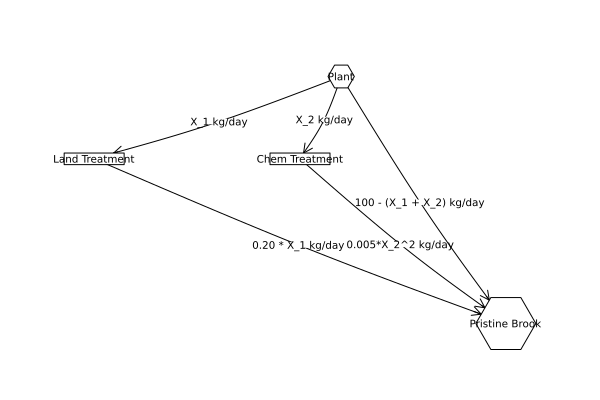

In [11]:
A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict((1, 2) => "X_1 kg/day", (1,3) => "X_2 kg/day", (1, 4) => "100 - (X_1 + X_2) kg/day", (2, 4) => "0.20 * X_1 kg/day", (3, 4) => "0.005*X_2^2 kg/day")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -3, -0.5, 2]
ypos = [1, 0, 0, -2]

p = graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)
display(p)

**In this problem**:

-   Formulate a mathematical model for the treatment cost and the amount
    of YUK that will be discharged into Pristine Brook based on the
    wastewater allocations. This is best done with some equations and
    supporting text explaining the derivation. Make sure you include, as
    additional equations in the model, any needed constraints on
    relevant values. You can find some basics on writing mathematical
    equations using the LaTeX typesetting syntax
    [here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
    and a cheatsheet with LaTeX commands can be found on the course
    website’s [Resources
    page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

-   Implement your systems model as a Julia function which computes the
    resulting YUK concentration and cost for a particular treatment
    plan. You can return multiple values from a function with a
    [tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1),
    as in:

    ``` {julia}
    function multiple_return_values(x, y)
        return (x+y, x*y)
    end

    a, b = multiple_return_values(2, 5)
    @show a;
    @show b;
    ```

    To evalute the function over vectors of inputs, you can *broadcast*
    the function by adding a decimal `.` before the function arguments
    and accessing the resulting values by writing a *comprehension* to
    loop over the individual outputs in the vector:

    ``` {julia}
    x = [1, 2, 3, 4, 5]
    y = [6, 7, 8, 9, 10]

    output = multiple_return_values.(x, y)
    a = [out[1] for out in output]
    b = [out[2] for out in output]
    @show a;
    @show b;
    ```

    Make sure you comment your code appropriately to make it clear what
    is going on and why.

-   Use your function to experiment with some different combinations of
    wastewater discharge and treatment and plot the results of these
    experiments. Can you find one that satisfies the YUK effluent
    standard (plot this as well as a dashed red line)? What was the
    cost? What can you say about the tradeoff between treatment cost and
    YUK concentration? You don’t have to find an “optimal” solution to
    this problem, but what do you think would be needed to find a better
    solution?

#### <font color = 'blue'> **SOLUTION - PROBLEM 4** </font>

**Figure 1 Edge Labels**

In Figure 1 above, I modified the edge labels to show the amount of YUK throughout the system, based on the amount of water allocated to the possible treatment plans.

**Mathematical model for the amount of YUK that will be discharged into Pristine Brook based on the wastewater allocations**

Let $T_{YUK}$ be the total kg of YUK discharged into Pristine Brook per day, $X_1$ be the $m^3$ of wastewater allocated to land treatment per day, and $X_2$ be the $m^3$ of wastewater allocated to chemical treatment per day. Recall that land treatment removes $80\%$ of the YUK from wastewater allocated there, i.e. $0.80 * X_1 kg/day$. Further, since chemical treatment has an efficiency of $1-0.005(X_2)$ it removes $1-0.005(X_2)\%$ of the YUK from wastewater allocated there, i.e. $(1-0.005(X_2))*X_2 kg/day$. Given that the plant produces $100 m^3/day * 1 kg/m^3 = 100 kg/day$ of YUK, to calculate $T_{YUK}$, we have:

$$T_{YUK} = 100 - (0.80 * X_1) - (1 - 0.005 * X_2)*X_2 \text{ where } X_1 + X_2 \leq 100$$

**Mathematical model for the treatment cost based on the wastewater allocations**

Let $C$ be the total cost of treatment. Recall that the land treatment costs $\$(X_1)^2/20$ per day and that the chemical treatment costs $\$1.50/m^3$. Then:

$$C = (X_1)^2/20 + 1.50X_2$$

**Implement systems model as a Julia function**

This systems model is implemented in the function *eval_model* below. It checks the initial condition that $X_1 + X_2 \leq 100$ then directly implements the YUK output and cost equations above.

**Experiment with different treatment plans and plots results. Find one that satisfies the YUK effluent standard. What was the cost? What can you say about the tradeoff between treatment cost and YUK concentration? You don’t have to find an “optimal” solution to this problem, but what do you think would be needed to find a better solution?**

*Experiment A*

In this experiment we will look at how allocating wastewater to land treatment affects the total YUK output and the cost of treatment plan, with the chemical treatment allocation fixed at $0$. Observe in *Figure A* below that the YUK produced by the plant only meets the effluent standard when $X_1=100$, and the cost of this treatment plan has increased quadratically to $500.

*Experiment B*

In this experiment we will look at how allocating wastewater to chemical treatment affects the total YUK output and the cost of treatment plan, with the land treatment allocation fixed at $0$. Observe in *Figure B* below that the YUK produced by the plant never meets the effluent standard and reaches a minimum value of about $50 kg/day$, and with this treatment plan the cost has increased linearly to $150.

*Experiment C*

In this experiment we will allocate all of the wastewater to either land or chemical treatment, where $x=X_2$ is the amount of wastewater allocated to land treatment and $X_1=100-X_2=100-x$ is the amount of wastewater allocated to chemical treatment. Substituting these values into our original formula for $T_{YUK}$, we have:
$$T_{YUK} = 100 - 0.80 * (100 - x) - (1 - 0.005x)*x$$
Observe in *Figure C* below that there exists an interval in which the "YUK produced by plant* curve dips beneath the YUK effluent standard, representing a range of possible treatment plans that meet the YUK effluent standard. We will now solve for the values of $X_1$ and $X_2$ that give this interval by finding where our equation is less than or equal to the YUK effluent standard of $20 kg/day$. Observe:
$$T_{YUK} = 100 - 0.80 * (100 - x) - (1 - 0.005x)*x <= 20$$
$$100 - 80 + 0.8x - x + 0.005x^2 <= 20$$
$$0.005x^2 - 0.2x <= 0$$
$$x^2 - 40x <= 0$$
$$(x)(x-40) <= 0$$
$$\Rightarrow 0 \leq x \leq 40$$
Since $x=X_2$ and $X_1 = 100-X_2 = 100 - x$, we have that effluent standard is met when $0 \leq X_2 \leq 40$ and correspondingly when $100 \geq X_1 \geq 60$. In other words, the effluent standard is met when $X_1 = 100, X_2 = 0$ and when $X_1=60, X_2=40$, as well as for the values in between those ranges where $X_1=100-X_2$. 

Observe in *Figure D* that this tradeoff is plotted against the cost of the treatment plan. When $X_1=100, X_2=0$ the treatment plan cost is $\frac{100^2}{20}+1.5*0=\$500$. Although this treatment plan meets the effluent standard, it is the most expensive possible treatment plan. When $X_1=60, X_2=40$ the treatment plan cost is $\frac{60^2}{20}+1.5*40=\$240$. This treatment plan is the cheapest treatment plan in this experiment that meets the effluent standard, although note that it does not minimize YUK pollution. 

It is evident that land treatments are more effective than chemical treatments for reducing YUK output and can even reduce YUK pollution to below the effluent standard on its own; however, the cost of this treatment plan increases quadratically with the amount of wastewater allocated to it. On the other hand, chemical treatments are less effective than land treatments but its cost increases linearly with the amount of wastewater allocated to it. To balance the tradeoff between treatment cost and YUK concentration, using a combination of the two treatment plans as demonstrated in *Experiment 3* above can reduce YUK output to below the effluent standard while keeping costs down. 

*Figure E* is a contour plot that shows the YUK output across every possible treatment plan, and *Figure F* is a contour plot that shows the cost across every possible treatment plan. To find a better solution, I would cross reference these two plots to find treatment plans that minimize YUK output and keep costs underneath a threshold given by the Cheap Plastic Products plant. 

In [12]:
function eval_model(X_1, X_2)
    # Check initial condition that amount of wastewater allocated to treatment plan does not exceed the total amount of wastewater that the plant is producing on a daily basis
    if X_1 + X_2 > 100 
        return(0,0)
    else
         # Calculate the  amount of YUK that plant produces daily given these wastewater allocations
        total_YUK = 100 - (0.80 * X_1) - (1 - 0.005 * X_2)*X_2 
        # Calculate cost of treatment plan given these wastewater allocations
        total_cost = (X_1^2)/20 + 1.50 * X_2  
        return (total_YUK, total_cost)
    end
end

eval_model (generic function with 1 method)

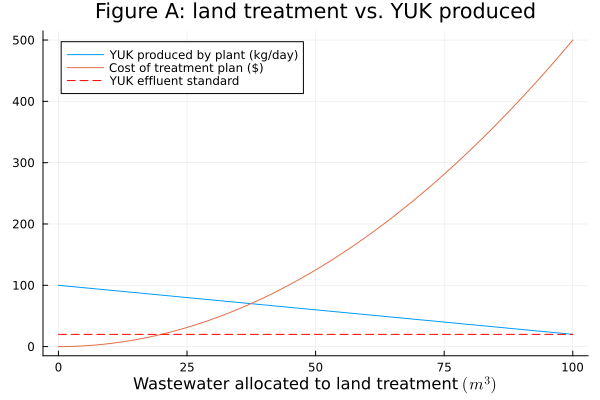

In [13]:
# Experiment A: How amount of wastewater allocated to land treatment affects total YUK output and cost of treatment plan
arr_X_1 = [i for i in range(0,100)]  # Amount of wastewater allocated to land treatment iteratively increases from 0 to 100
arr_X_2 = [0 for i in range(0,100)]  # Amount of wastewater allocated to chemical treatment is fixed at 0
output = eval_model.(arr_X_1, arr_X_2)
arr_total_YUK = [i[1] for i in output]
arr_total_cost = [i[2] for i in output]

plot(arr_X_1, arr_total_YUK, label="YUK produced by plant (kg/day)")
plot!(arr_X_1, arr_total_cost, label="Cost of treatment plan (\$)")
plot!(arr_X_1, [20 for i in range(0,100)], label="YUK effluent standard", linestyle=:dash, linecolor=:red)
title!("Figure A: land treatment vs. YUK produced")
xlabel!("Wastewater allocated to land treatment " * L"(m^3)")

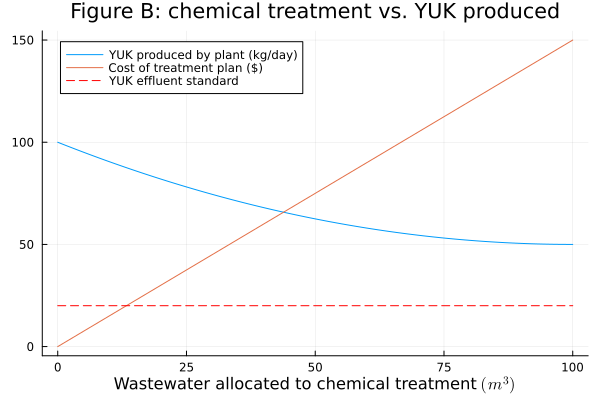

In [22]:
# Experiment B: How amount of wastewater allocated to chemical treatment affects total YUK output and cost of treatment plan
arr_X_1 = [0 for i in range(0,100)]  # Amount of wastewater allocated to land treatment is fixed at 0
arr_X_2 = [i for i in range(0,100)]  # Amount of wastewater allocated to chemical treatment iteratively increases from 0 to 100
output = eval_model.(arr_X_1, arr_X_2)
arr_total_YUK = [i[1] for i in output]
arr_cost_YUK = [i[2] for i in output]

plot(arr_X_2, arr_total_YUK, label="YUK produced by plant (kg/day)")
plot!(arr_X_2, arr_cost_YUK, label="Cost of treatment plan (\$)")
plot!(arr_X_2, [20 for i in range(0,100)], label="YUK effluent standard", linestyle=:dash, linecolor=:red)
title!("Figure B: chemical treatment vs. YUK produced")
xlabel!("Wastewater allocated to chemical treatment " * L"(m^3)")

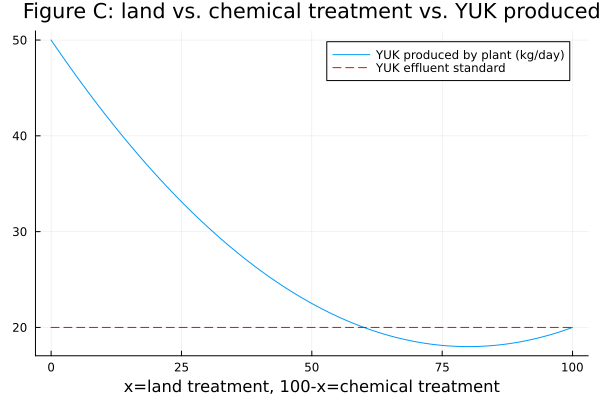

In [15]:
# Experiment C: How amount of wastewater allocated to land vs. chemical treatment affects total YUK output and cost of treatment plan
arr_X_1 = [i for i in range(0,100)]  # Amount of wastewater allocated to land treatment iteratively increases from 0 to 100
arr_X_2 = [100 - i for i in range(0,100)]  # Amount of wastewater allocated to chemical treatment iteratively decreases from 100 to 0
output = eval_model.(arr_X_1, arr_X_2)
arr_total_YUK = [i[1] for i in output]
arr_total_cost = [i[2] for i in output]

plot(arr_X_1, arr_total_YUK, label="YUK produced by plant (kg/day)")
# plot!(arr_X_1, arr_total_cost, label="Cost of treatment plan (\$)")
plot!(arr_X_1, [20 for i in range(0,100)], label="YUK effluent standard", linestyle=:dash, linecolor=:red)
title!("Figure C: land vs. chemical treatment vs. YUK produced")
xlabel!("x=land treatment, 100-x=chemical treatment")

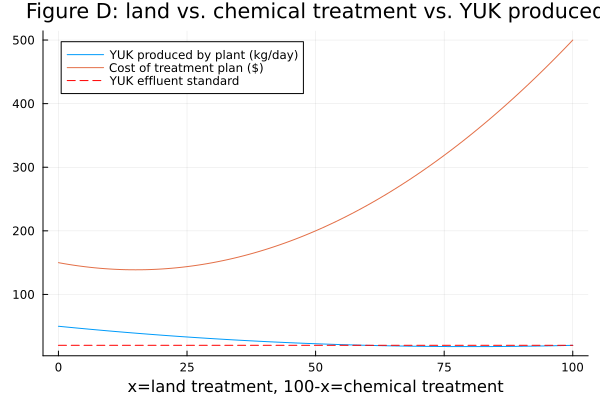

In [16]:
# Experiment C With cost of treatment plan
plot(arr_X_1, arr_total_YUK, label="YUK produced by plant (kg/day)")
plot!(arr_X_1, arr_total_cost, label="Cost of treatment plan (\$)")
plot!(arr_X_1, [20 for i in range(0,100)], label="YUK effluent standard", linestyle=:dash, linecolor=:red)
title!("Figure D: land vs. chemical treatment vs. YUK produced")
xlabel!("x=land treatment, 100-x=chemical treatment")

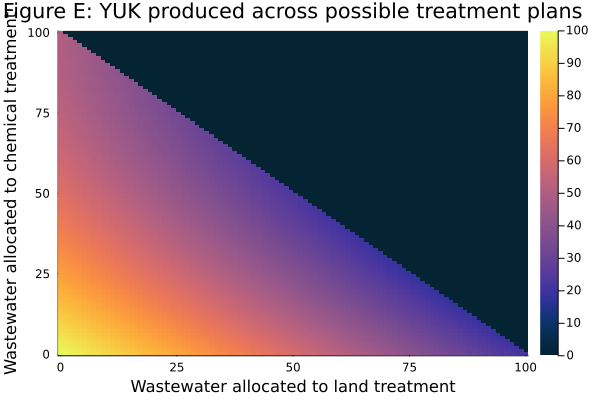

In [17]:
# Experiment E: YUK output across all possible treatment plans
function calc_YUK(X_1, X_2)
    if X_1 + X_2 > 100  # Check initial condition that amount of wastewater allocated to treatment plan does not exceed the total amount of wastewater that the plant is producing on a daily basis
        return 0
    else
        total_YUK = 100 - (0.80 * X_1) - (1 - 0.005 * X_2)*X_2  # Calculate amount of YUK that the plant produces daily given wastewater allocations
        return total_YUK
    end
end

X_1 = range(0,100, length=100)
X_2 = range(0,100, length=100)
heatmap(X_1, X_2, calc_YUK, c = :thermal)
xlabel!("Wastewater allocated to land treatment")
ylabel!("Wastewater allocated to chemical treatment")
title!("Figure E: YUK produced across possible treatment plans")

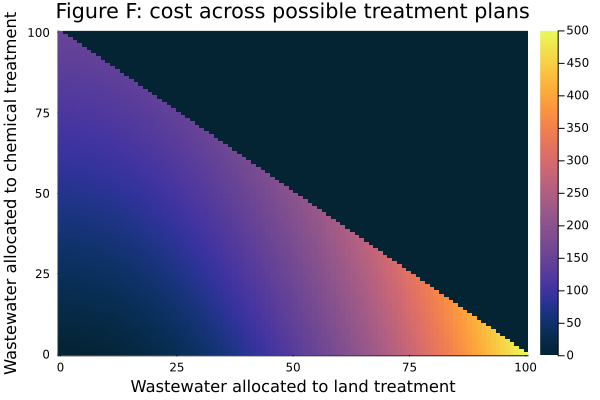

In [18]:
# Experiment F: cost across all possible treatment plans
function calc_cost(X_1, X_2)
    if X_1 + X_2 > 100  # Check initial condition that amount of wastewater allocated to treatment plan does not exceed the total amount of wastewater that the plant is producing on a daily basis
        return 0
    else
        cost_YUK = (X_1^2)/20 + 1.50 * X_2  # Calculate cost of treatment plan
        return cost_YUK
    end
end

X_1 = range(0,100, length=100)
X_2 = range(0,100, length=100)
heatmap(X_1, X_2, calc_cost, c = :thermal)
xlabel!("Wastewater allocated to land treatment")
ylabel!("Wastewater allocated to chemical treatment")
title!("Figure F: cost across possible treatment plans")

### Problem 5 (10 points)

**This problem is only required for students in BEE 5750**.

#### Problem 5.1

Using a
[comprehension](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#comprehensions),
count the number of odd numbers between 0 and 149.

> **Hint**
>
> `iseven()` returns `true` for even numbers and `false` for odd
> numbers.

#### <font color = 'blue'> **SOLUTION - PROBLEM 5.1** </font>

The function *count_oddNumbers* below takes in an integer *x* and uses a comprehension to create an array of the odd numbers between 0 and *x*, inclusive of *x*. It does this by specifying that the array to be created should start from 1, iterate in increments of 2, and end at *x*. Observe that this function gives the correct output of $75$ for the input value of $149$.

In [19]:
function count_oddNumbers(x)
    arr_oddNumbers = [i for i in 1:2:x]
    return size(arr_oddNumbers)
end

count_oddNumbers(149)

(75,)

#### Problem 5.2

Write a function `polynomial(x, a)` which calculates the polynomial
$$p(x) = \sum_{i=1}^n a_i x^i$$

based on a point `x` and a coefficient vector `a` of length `n` using a
loop. Test your function by computing $$p(x) = 2x^3 - x^2 + 1$$ at
$x=2$.

#### <font color = 'blue'> **SOLUTION - PROBLEM 5.2** </font>
The function *polynomial* iterates through the elements of the coefficient vector *a* and calculates the value of its term in the expression. To keep track of which power polynomial this coefficient corresponds to, the variable *exponential_power* is initialized to the highest power term in the expression, i.e. *length(a)-1*, and is decreased by 1 in each iteration of the *for* loop. The running sum of these terms is also updated at each step of the loop and returned at the end of the function. 

In [20]:
function polynomial(x, a)
    exponential_power = length(a)-1  # Initialize to first exponential power in expression
    sum = 0
    for i in a  # Iterate through elements of the coefficient vector
        sum += i * x^exponential_power  # Calculate term
        exponential_power -= 1
    end
    return sum
end

polynomial(2, [2, -1, 0, 1])

13

## References

List any external references consulted, including classmates.
- Julia Basics page on course website
- Julia Docs
- Gabby at TA hours
- Desmos calculator to check graphs
- Stack Overflow